**MACHINE LEARNING LAB - 05/08/2020 | SANDHYA M (1947139) -  3MCS**

**Lab Session 5 - Linear Discriminant Analysis**

1. Linear discriminant analysis is supervised machine learning, the technique used to find a linear combination of features that separates two or more classes of objects or events. 

2. The goal of LDA is to discriminate different classes in low dimensional space by retaining the components containing feature values that have the best separation across classes. 

**Step 1: Importing Packages**

In [3]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

**Step2: Loading Dataset and separating the dependent and and independent variable**

In [5]:
winedataset = load_wine()
independentVariables = pd.DataFrame(winedataset.data, columns = winedataset.feature_names)
dependentVariable = pd.Categorical.from_codes(winedataset.target, winedataset.target_names)

**Step3: Independent Variables**

In [6]:
independentVariables.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Step 4: Details of Independent Variables**

In [8]:
print("Shape of the data, excluding dependent variables", independentVariables.shape)
print("Name and type of independent Variables\n:", independentVariables.info())

Shape of the data, excluding dependent variables (178, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB
Name and type of independent Variables
: None


**Step 5: Target Variable**

In [9]:
print("Classes of Dependent Variable", winedataset.target_names)

Classes of Dependent Variable ['class_0' 'class_1' 'class_2']


**Step 6: Data Frame having both variables**

In [11]:
wineDataFrame = independentVariables.join(pd.Series(dependentVariable, name="class"))
wineDataFrame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


**Step 7: Feature Vector for all classes**

In [19]:
between_class_feature_means = pd.DataFrame(columns=winedataset.target_names)
for c, rows in wineDataFrame.groupby('class'):
    between_class_feature_means[c] = rows.mean()
between_class_feature_means

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


**Step 8: Class Scatter Matrix**

In [25]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in wineDataFrame.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    
    s = np.zeros((13,13))
for index, row in rows.iterrows():
    x, mc = row.values.reshape(13,1), between_class_feature_means[c].values.reshape(13,1)
    
    s += (x - mc).dot((x - mc).T)
    
within_class_scatter_matrix += s

feature_means = wineDataFrame.mean()
between_class_scatter_matrix=np.zeros((13,13))
for c in between_class_feature_means:
    n = len(wineDataFrame.loc[wineDataFrame['class'] == c].index)
    
    mc, m = between_class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    between_class_scatter_matrix +=n * (mc-m).dot((mc-m).T)
between_class_scatter_matrix

array([[ 7.07948499e+01,  1.37229257e+01,  1.06684933e+01,
        -1.31860426e+02,  5.52620156e+02,  2.12568615e+01,
         3.00293312e+01, -2.61778351e+00,  8.30762344e+00,
         1.38875865e+02, -2.49334780e+00,  8.25295347e+00,
         2.69868967e+04],
       [ 1.37229257e+01,  6.55780370e+01,  5.15564454e+00,
         1.17928430e+02,  1.50619799e+00, -3.89429093e+01,
        -7.95309567e+01,  5.42915083e+00, -2.79935518e+01,
         1.59408872e+02, -1.79954555e+01, -5.99058382e+01,
        -6.17091332e+03],
       [ 1.06684933e+01,  5.15564454e+00,  1.75922271e+00,
        -1.28292335e+01,  7.80946503e+01,  1.09001750e+00,
         3.36713399e-01, -1.03155491e-01, -2.00866484e-01,
         2.74298320e+01, -1.23513355e+00, -1.77465829e+00,
         3.50726571e+03],
       [-1.31860426e+02,  1.17928430e+02, -1.28292335e+01,
         5.72833493e+02, -1.27015372e+03, -1.37801068e+02,
        -2.50581989e+02,  1.84145559e+01, -8.29870886e+01,
         4.34834234e+01, -3.52934937e

**Step 9: Linear Discriminats value**

In [26]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

**Step 10: Sorting Eigen values from highest to lowest**
    
1. The eigenvectors with the highest eigenvalues carry the most information about the distribution of the data. 
2. Now, since we have got the eigenvalues and eigenvector, sort the eigenvalues from highest to lowest and select the first k     eigenvectors.

3. In order to ensure that the eigenvalue maps to the same eigenvector after sorting, we place them in a temporary array.

In [27]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

237.46123198302251
46.98285938758684
1.0071457092992053e-14
9.257305248209307e-15
9.257305248209307e-15
8.388087322616956e-15
8.388087322616956e-15
7.439598232196409e-15
7.105427357601002e-15
5.5270433288224486e-15
5.5270433288224486e-15
1.5939319649034697e-15
2.421231721682941e-16


**Step 11: Variance expressed as Percentage**

In [29]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))
    

Explained Variance
Eigenvector 0: 0.8348256799387275
Eigenvector 1: 0.1651743200612724
Eigenvector 2: 3.540751029301465e-17
Eigenvector 3: 3.254525416085276e-17
Eigenvector 4: 3.254525416085276e-17
Eigenvector 5: 2.948940609804373e-17
Eigenvector 6: 2.948940609804373e-17
Eigenvector 7: 2.6154870000457026e-17
Eigenvector 8: 2.498004906118145e-17
Eigenvector 9: 1.9431035822154324e-17
Eigenvector 10: 1.9431035822154324e-17
Eigenvector 11: 5.603674019815359e-18
Eigenvector 12: 8.512153337466437e-19


**Step 12: New Feature Space**
    (y=X.W)

1. "X" is a n×d matrix with n samples and d dimensions 
2. “y” is a n×k matrix with n samples and k ( k<n) dimensions. 
3.  Y is composed of the LDA components (the new feature space).

In [31]:
matrix_W = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

X_lda = np.array(independentVariables.dot(matrix_W))

**Step 13: Encoding**

In [37]:
le = LabelEncoder()
y = le.fit_transform(wineDataFrame['class'])

**Step 14: Plotting of data as a function of the two LDA Components**

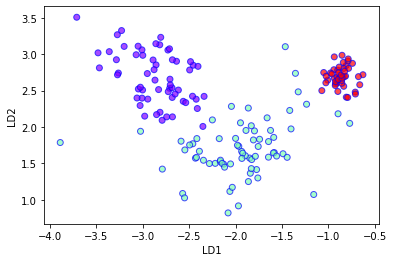

In [39]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b')

# Random Forest Classifier Model

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=111)
Model1 = RandomForestClassifier()
Model1.fit(X_train, y_train)
y_pred = Model1.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 13]], dtype=int64)

**Using “independentVariables” itself instead of using LDA**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(independentVariables, y, random_state=111)
Model1 = RandomForestClassifier()
Model1.fit(X_train, y_train)
y_pred = Model1.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[14,  1,  0],
       [ 1, 15,  1],
       [ 0,  0, 13]], dtype=int64)